In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from IPython.display import display, Markdown
warnings.filterwarnings("ignore")


%matplotlib inline

In [2]:
# utility block
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
palette = ["#4B0082", "#6500B0", "#8000DE", "#AC3BFF"]
cat_color = ['#BFD7ED','#60A3D9','#0074B7','#003B73']
title_color = '#003B73'
test_color = ['#BFD7ED', '#60A3D9', '#0074B7', '#41729F', '#003B73']
comp_color = ['#FFF4BD', '#F4B9B8', '#85D2D0', '#887BB0', '#BD97CB']
purble = ['#D7A1F9', '#C576F6', '#B24BF3', '#A020F0', '#880ED4', '#6C0BA9', '#51087E']
t='#51087E'

# ['#FFF4BD', '#F4B9B8', '#85D2D0', '#887BB0']    ['#F9D030', '#F62AA0', '#B8EE30', '#26train_dataD0']

g_palette = sns.color_palette(["#c7522a","#e5c185","#fbf2c4","#74a892","#008585"])
c_palette = sns.color_palette(["#c7522a","#e5c185","#fbf2c4","#74a892","#008585"])
com_palette = sns.color_palette(["#c7522a","#e5c185"])
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data['Survived'] = train_data['Survived'].map({0:'dead',1:'survived'})

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


++++++++++++++++++++++++++++++++++++++++++++++
Age==>19.87 | Cabin==>77.1 | Embarked==>0.22 | 
++++++++++++++++++++++++++++++++++++++++++++++


<AxesSubplot:>

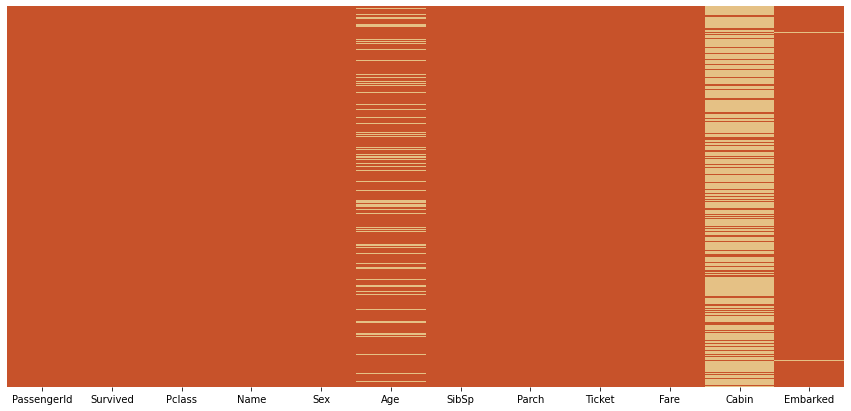

In [7]:
def null_percent(col):
    percentage = round(col.isnull().sum()/len(col)*100,2)
    if percentage > 0:
        print(f'{col.name}==>{percentage} |', end=' ')
print('+'*46)
train_data.apply(null_percent)
print()
print('+'*46)
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap=com_palette)

In [8]:
def split_types(train_data):
    num = []
    cat = []
    for col in train_data.columns:
        if len(list(train_data[col].unique())) > 10:
            num.append(col)
        else:
            cat.append(col)
    return [num, cat]



res = split_types(train_data)
num, cat= res
num.remove('Ticket')
num.remove('Cabin')
num.remove('Name')
num.remove('PassengerId')


In [9]:
num

['Age', 'Fare']

In [10]:
cat

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

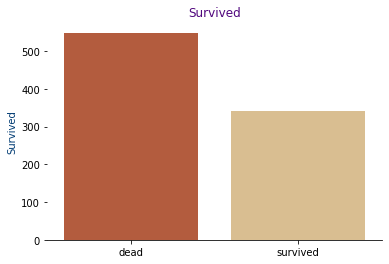

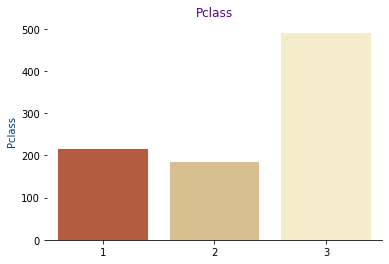

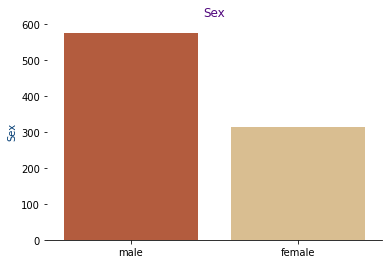

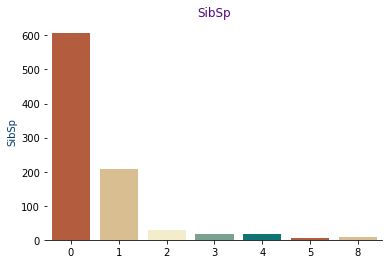

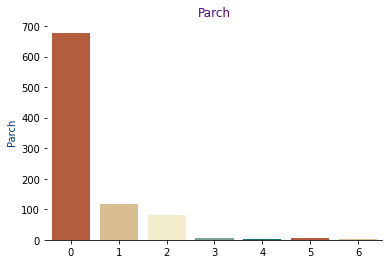

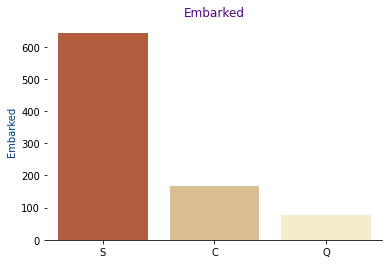

In [11]:
for i in cat:
    count = train_data[i].value_counts()
    ax = sns.barplot(x = count.index , y = count,palette=c_palette)

    # ax.set(xlabel = 'survived                                    Not survived')
    # ax.set_xlabel(' survived                        Not survived', color=title_color)
    ax.set_ylabel(i,color=title_color)
    ax.set_title(i, color=t)
    sns.despine(left=True)
    plt.show()

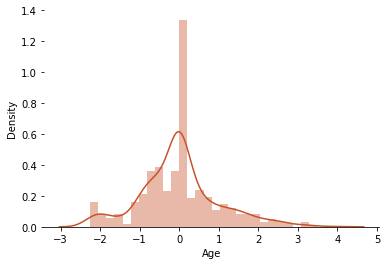

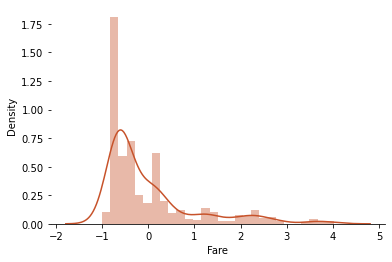

In [39]:
for i in num:
    sns.distplot(train_data[i], color="#c7522a")
    sns.despine(left=True)
    plt.show()

In [13]:
def plot(col):
    survived = train_data[train_data['Survived']=='survived'][col].value_counts()
    dead = train_data[train_data['Survived']=='dead'][col].value_counts()
    
    dd = pd.DataFrame([survived,dead])
    dd.index=['Survived','Dead']
    dd.plot(kind="bar",stacked=True, figsize=(15,5),title=i,fontsize=15, color=["#c7522a","#e5c185","#fbf2c4","#74a892","#008585"])
    plt.show()
    

In [14]:
def info(i):
    res = train_data.groupby([i,'Survived'])['Survived'].count()
    ans = pd.DataFrame(res)
    ans['sum'] = ans.groupby(i).transform(sum)
    
    display(Markdown('<h2 style="color: #F48668"> Observations </h2>'))
    for i in ans.index:
        percentage = round(ans.loc[i].values[0] / ans.loc[i,'sum']*100,2)
        type_percentage = round(ans.loc[i,'sum'] / train_data.__len__() *100,2)
        display(Markdown(f'- <span style="color: #B2BD7E "> percentage of {i[1]} {i[0]} is  {percentage}%  from  {type_percentage}% .</span>'))

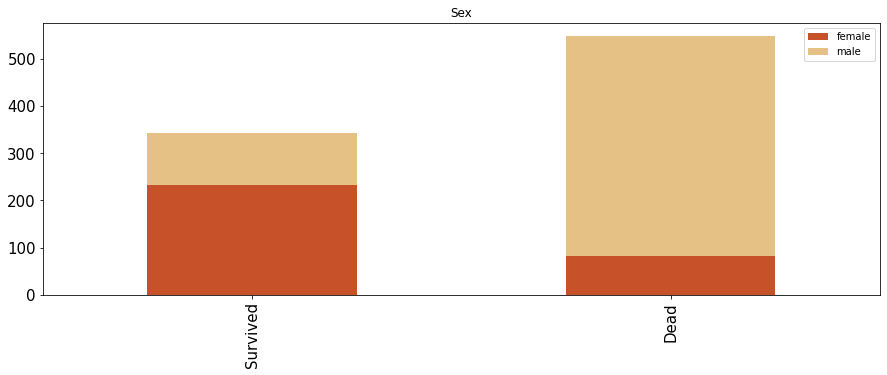

<h2 style="color: #F48668"> Observations </h2>

- <span style="color: #B2BD7E "> percentage of dead female is  25.8%  from  35.24% .</span>

- <span style="color: #B2BD7E "> percentage of survived female is  74.2%  from  35.24% .</span>

- <span style="color: #B2BD7E "> percentage of dead male is  81.11%  from  64.76% .</span>

- <span style="color: #B2BD7E "> percentage of survived male is  18.89%  from  64.76% .</span>

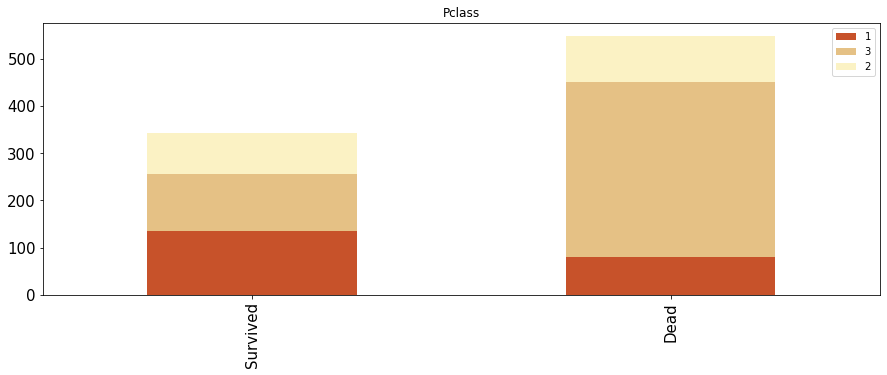

<h2 style="color: #F48668"> Observations </h2>

- <span style="color: #B2BD7E "> percentage of dead 1 is  37.04%  from  24.24% .</span>

- <span style="color: #B2BD7E "> percentage of survived 1 is  62.96%  from  24.24% .</span>

- <span style="color: #B2BD7E "> percentage of dead 2 is  52.72%  from  20.65% .</span>

- <span style="color: #B2BD7E "> percentage of survived 2 is  47.28%  from  20.65% .</span>

- <span style="color: #B2BD7E "> percentage of dead 3 is  75.76%  from  55.11% .</span>

- <span style="color: #B2BD7E "> percentage of survived 3 is  24.24%  from  55.11% .</span>

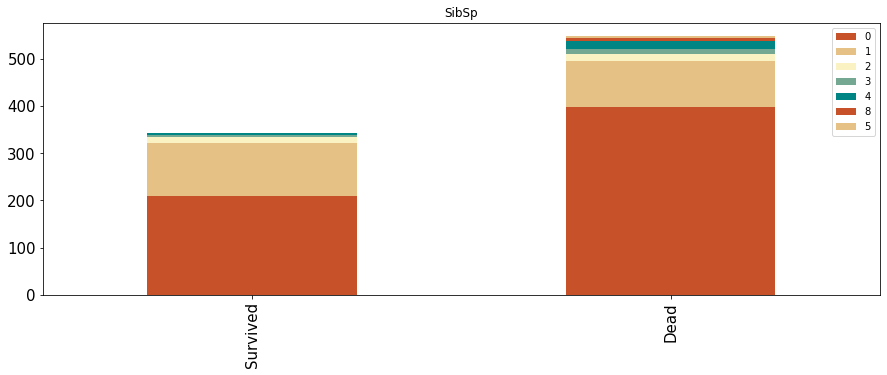

<h2 style="color: #F48668"> Observations </h2>

- <span style="color: #B2BD7E "> percentage of dead 0 is  65.46%  from  68.24% .</span>

- <span style="color: #B2BD7E "> percentage of survived 0 is  34.54%  from  68.24% .</span>

- <span style="color: #B2BD7E "> percentage of dead 1 is  46.41%  from  23.46% .</span>

- <span style="color: #B2BD7E "> percentage of survived 1 is  53.59%  from  23.46% .</span>

- <span style="color: #B2BD7E "> percentage of dead 2 is  53.57%  from  3.14% .</span>

- <span style="color: #B2BD7E "> percentage of survived 2 is  46.43%  from  3.14% .</span>

- <span style="color: #B2BD7E "> percentage of dead 3 is  75.0%  from  1.8% .</span>

- <span style="color: #B2BD7E "> percentage of survived 3 is  25.0%  from  1.8% .</span>

- <span style="color: #B2BD7E "> percentage of dead 4 is  83.33%  from  2.02% .</span>

- <span style="color: #B2BD7E "> percentage of survived 4 is  16.67%  from  2.02% .</span>

- <span style="color: #B2BD7E "> percentage of dead 5 is  100.0%  from  0.56% .</span>

- <span style="color: #B2BD7E "> percentage of dead 8 is  100.0%  from  0.79% .</span>

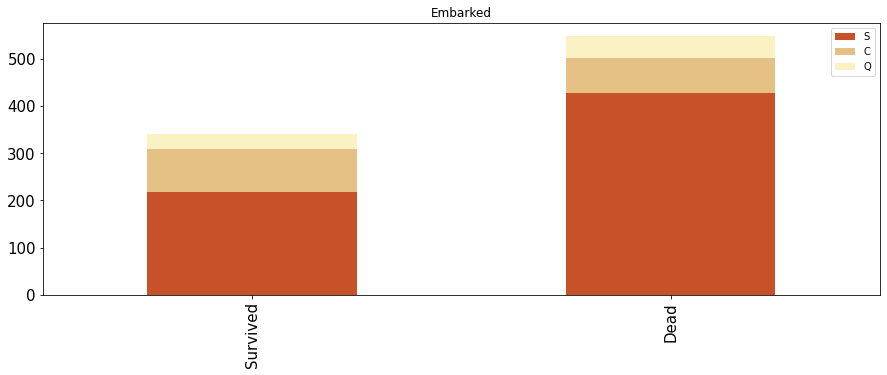

<h2 style="color: #F48668"> Observations </h2>

- <span style="color: #B2BD7E "> percentage of dead C is  44.64%  from  18.86% .</span>

- <span style="color: #B2BD7E "> percentage of survived C is  55.36%  from  18.86% .</span>

- <span style="color: #B2BD7E "> percentage of dead Q is  61.04%  from  8.64% .</span>

- <span style="color: #B2BD7E "> percentage of survived Q is  38.96%  from  8.64% .</span>

- <span style="color: #B2BD7E "> percentage of dead S is  66.3%  from  72.28% .</span>

- <span style="color: #B2BD7E "> percentage of survived S is  33.7%  from  72.28% .</span>

In [15]:
for i in ['Sex', 'Pclass', 'SibSp', 'Embarked']:
    plot(i)
    info(i)

<center><h2 style='color:#CD5C5C;'>Preprocessing</h2></center>

> Deal with nulls

In [16]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace= True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace= True)
del train_data['Cabin']
del test_data['Cabin']

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace= True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace = True)
test_data.dropna(inplace=True)




In [19]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

> Deal with outliers

In [20]:
def remove(df,ls):
    ls=sorted(set(ls))
    df.drop(ls,inplace = True)


def outliers_list(col,df):
    mean, std = col.mean(), col.std()
    cut_off = mean*3
    upper_cut, lower_cut = mean + cut_off, mean - cut_off
    ls = col.index[(col<lower_cut) | (col>upper_cut)]
    remove(df, ls)



In [21]:
train_data[['Age', 'Fare']].apply(outliers_list,df=train_data)


Age     None
Fare    None
dtype: object

In [22]:
train_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,446.449004,2.366940,29.587570,0.518171,0.359906,24.003770
std,258.798263,0.806479,12.960041,1.109587,0.790576,23.838119
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,219.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,450.000000,3.000000,29.699118,0.000000,0.000000,13.000000
75%,668.000000,3.000000,35.000000,1.000000,0.000000,28.500000
max,891.000000,3.000000,80.000000,8.000000,6.000000,120.000000


In [23]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,dead,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,dead,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


> Scale data

In [24]:
for i in num:
    train_data[i]= (train_data[i]-train_data[i].mean())/train_data[i].std()


In [25]:
train_data['Age'].describe()

count    8.530000e+02
mean    -8.329927e-17
std      1.000000e+00
min     -2.250577e+00
25%     -5.854588e-01
50%      8.607031e-03
75%      4.176244e-01
max      3.889836e+00
Name: Age, dtype: float64

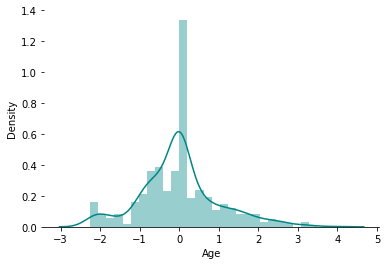

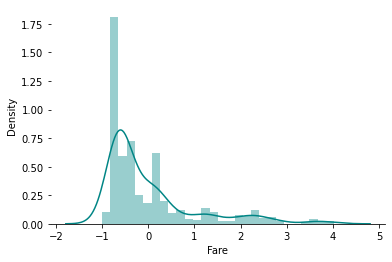

In [40]:
for i in num:
        sns.distplot(train_data[i], color="#008585")
        sns.despine(left=True)
        plt.show()

> map categorical data

In [27]:
train_data['Sex']= train_data['Sex'].map({'male':1,'female':0})
test_data['Sex']= test_data['Sex'].map({'male':1,'female':0})

In [28]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,dead,3,"Braund, Mr. Owen Harris",1,-0.585459,1,0,A/5 21171,-0.702814,S
1,2,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.649105,1,0,PC 17599,1.983358,C
2,3,survived,3,"Heikkinen, Miss. Laina",0,-0.276818,0,0,STON/O2. 3101282,-0.674498,S
3,4,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.417624,1,0,113803,1.220576,S
4,5,dead,3,"Allen, Mr. William Henry",1,0.417624,0,0,373450,-0.669255,S


In [29]:
train_data['Embarked']= train_data['Embarked'].map({'C':2, 'Q':1,'S':0}) 
test_data['Embarked']= test_data['Embarked'].map({'C':2, 'Q':1,'S':0}) 
train_data['Survived']= train_data['Survived'].map({'survived':1, 'dead':0}) 

In [30]:
drop_list = ['PassengerId', 'Name', 'Ticket']
train_data.drop(drop_list,axis=1,inplace=True)
test_data.drop(drop_list,axis=1,inplace=True)

In [31]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.585459,1,0,-0.702814,0
1,1,1,0,0.649105,1,0,1.983358,2
2,1,3,0,-0.276818,0,0,-0.674498,0
3,1,1,0,0.417624,1,0,1.220576,0
4,0,3,1,0.417624,0,0,-0.669255,0


<center><h2 style='color:#CD5C5C;'>Modeling</h2></center>

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from sklearn.tree import DecisionTreeClassifier


In [33]:

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [34]:
X = train_data.drop('Survived' , axis = 1 )
y = train_data['Survived']
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state =41)

In [35]:
models={
    "Logistic Regression":LogisticRegressionCV(multi_class='multinomial'),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", max_depth=4),
}

In [36]:
accuracies = {
    "Name":[],
    "Train_score":[],
    "Test_score":[],
    "precision_score":[],
    "recall_score":[],
    "f1_score":[]
}

In [37]:
for name,model in models.items():
    model.fit(X_train,y_train)
    accuracies['Name'].append(name)
    accuracies['Train_score'].append(model.score(X_train,y_train))
    accuracies['Test_score'].append(model.score(X_test,y_test))
    y_pred = model.predict(X_test)
    accuracies['precision_score'].append(precision_score(y_pred,y_test,average='weighted'))
    accuracies['recall_score'].append(recall_score(y_pred,y_test,average='weighted'))
    accuracies['f1_score'].append(f1_score(y_pred,y_test,average='weighted'))

In [38]:
df_score = pd.DataFrame(accuracies)
df_score

,Name,Train_score,Test_score,precision_score,recall_score,f1_score
0,Logistic Regression,0.792295,0.808594,0.811113,0.808594,0.809538
1,Decision Tree,0.825796,0.839844,0.845027,0.839844,0.841372
